- **지도학습(supervised learning)**  
  입력과 출력 샘플데이터가 있고  
  주어진 입력으로부터 출력을 예측하고자 할 때 사용
  - 분류(classification)
    - 이진 분류(binary classification)
    - 다중 분류(multiclass classification) 
  - 회귀(regression)
  
   
----
* _모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 training set에서 test set으로 일반화(generalization)되었다고 한다!_

- 일반화(generalization)
- 과대적합(overfitting) : 가진 정보를 모두 사용하여 너무 복잡한 모델을 만드는 것
- 과소적합(underfitting) : 너무 간단한 모델이 선택되는 것
---


- 모델 복잡도 : 입력데이터의 다양성과 관련
  - 다양한 sample이 많은 데이터셋일수록 overfitting 없이 더 복잡한 모델을 만들 수 있다  
    (보통은 데이터 샘플이 많아지면 다양성도 증가하나, 같은 샘플을 중복하거나 매우 비슷한 데이터를 모으는 것은 다양성에 도움이 되지 않음)
    (실제 환경에서는 모델을 변경/조정하는 것보다 데이터를 얼마나 모을지 잘 정하는 게 더 이득일 수도 있다)

- **저차원 데이터셋** : 특성(feature)이 적은 데이터셋  
  저차원 데이터셋이 (인간이) 직관을 얻기는 좋으나 그 직관이 고차원 데이터셋에도 유지되지 않을 수 있다
- **고차원 데이터셋** : 특성(feature)이 많은 데이터셋  
  예) Microarray dataset, Image dataset, Test dataset ...  
  차원이 커질수록 데이터 공간의 크기 및 필요한 데이터의 수는 지수적으로 증가
  - **차원의 저주(Curse of dimensionality)**

____

## 1) k-NN

### 1. k-최근접 이웃(k-NN, k-Nearest Neighbors)
    - 가장 간단한 머신러닝 알고리즘
    - train dataset을 그냥 저장하는 것이 모델을 만드는 과정의 전부
    - 새로운 sample에 대해 예측할 땐 알고리즘이 train dataset에서 가장 가까운 sample, 즉 *최근접 이웃*을 찾는다
    - 임의로 k개의 이웃을 선택할 수 있다  

----
#### **KNeighborsClassifier 분석**  
- 결정 경계(decision boundary) : 이웃의 수를 늘릴수록 결정 경계는 부드러워짐 (부드러운 결정경계 -> 더 단순한 모델)
  - 이웃을 적게 사용 → 모델의 복잡도 증가
  - 이웃을 많이 사용 → 모델의 복잡도 감소
----
### 2. k-최근접 이웃 회귀
   #### **KNeighborsRegressor**
   

- model.score(X_test, y_test)
  - 분류 모델은 0.86... 이런 식의 값 => 86% 옳게 분류하였다
  - 회귀 모델은 0.83 이런 식의 값 => 결정계수 R^2값 반환
    - 결정계수 : 예측의 정확도를 0 ~ 1 사이값으로 계산
   
----
### KNeighbors 분류기에 중요한 매개변수
1) sample 사이의 거리를 재는 방법  
   기본적으로 유클리디안 거리방식 사용 (여러 환경에서 잘 동작한다)
2) 이웃의 수  
   보통 3개, 5개 정도로 적을 때 잘 사용

### K-NN 장단점
장점  
- 이해하기 쉽다  
- 많은 조정 없이도 자주 좋은 성능을 발휘한다 -> 더 복잡한 알고리즘을 적용하기 전에 시도해보기 좋다

단점
- training set이 크면(특성이 많거나 샘플이 많거나..) 예측이 느려짐
- sparse한 dataset과는 특히 잘 작동하지 않음

In [6]:
# 필요한 모듈 불러오기

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# scikit-learn의 데이터셋 1. Wisconsin Breast Cancer Dataset

from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()

In [10]:
print('cancer.keys():\n{}'.format(cancer_dataset.keys()))

cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [14]:
print('유방암 데이터의 형태:\n{}'.format(cancer_dataset.data.shape))

유방암 데이터의 형태:
(569, 30)


In [21]:
print('클래스별 샘플 개수:\n{}'.format(
    {n: v for n, v in zip(cancer_dataset.target_names, np.bincount(cancer_dataset.target))}
))
print('\n')
print('특성 이름:\n{}'.format(cancer_dataset.feature_names))

클래스별 샘플 개수:
{'malignant': 212, 'benign': 357}


특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [22]:
cancer_dataset.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [23]:
# k최근접 이웃 분류 적용해보기

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_dataset.data, cancer_dataset.target, test_size=0.2, random_state=5
)

In [24]:
clf_model = KNeighborsClassifier(n_neighbors=3)

In [25]:
clf_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
print("테스트 세트 예측:\n{}".format(clf_model.predict(X_test)))

테스트 세트 예측:
[0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0
 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1
 0 1 0]


In [28]:
print("테스트 세트 정확도:\n{}".format(clf_model.score(X_test, y_test)))

테스트 세트 정확도:
0.9210526315789473


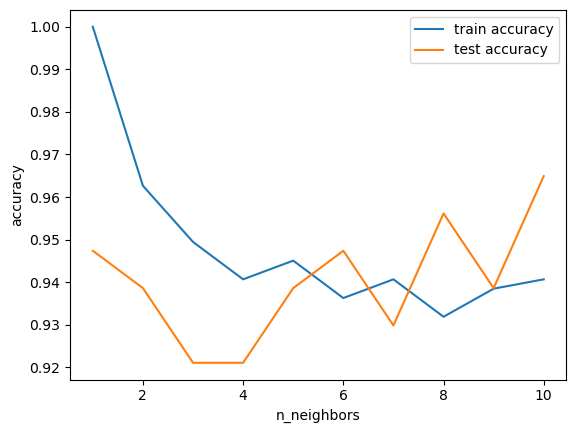

In [31]:
# 이웃의 수에 따른 train set/test set 성능 평가

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
for n in range(1, 11):
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    # train set accuracy 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(range(1, 11), training_accuracy, label='train accuracy')
plt.plot(range(1, 11), test_accuracy, label='test accuracy')
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

- 이웃의 수가 1개일 때는 train data에 대한 예측이 완벽함 (accuracy = 1)
- 이웃의 수가 늘어나면 모델은 단순해지고 train data의 accuracy가 줄어든다
  
*test accuracy가 이웃의 수 6 이상부터 저런 양상을 보이는 이유는?*

In [33]:
# scikit-learn의 데이터셋 2. Boston Housing Dataset -> `load_boston` has been removed from scikit-learn since version 1.2.
# scikit-learn의 데이터셋 3. Diabetes Dataset

from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()

In [35]:
print('diabetes_dataset.keys():\n{}'.format(diabetes_dataset.keys()))

diabetes_dataset.keys():
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [36]:
print('당뇨병 환자 데이터의 형태\n:{}'.format(diabetes_dataset.data.shape))

당뇨병 환자 데이터의 형태
:(442, 10)


In [42]:
diabetes_df = pd.DataFrame(diabetes_dataset.data, columns = diabetes_dataset['feature_names'])
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [43]:
diabetes_dataset.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [44]:
diabetes_dataset.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [45]:
# k 최근접 이웃 회귀 적용해보기

#train/test split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_dataset.data, diabetes_dataset.target, test_size=0.2, random_state=5
)

In [50]:
reg_model = KNeighborsRegressor(n_neighbors=6)
reg_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [51]:
# print('테스트 세트 예측:\n{}'.format(reg_model.predict(X_test)))
# print('\n')

print('테스트 세트 R^2:\n{}'.format(reg_model.score(X_test, y_test))) # n_neighbors=3일때 R^2 = 0.42227938857575487

테스트 세트 R^2:
0.48423276907809265


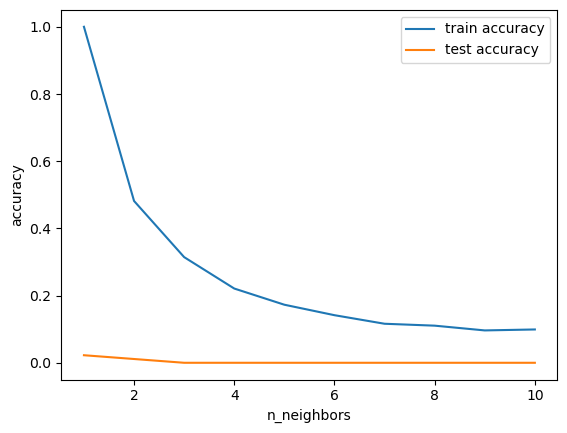

In [52]:
# 이웃의 수에 따른 train set/test set 성능 평가

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
for n in range(1, 11):
    # 모델 생성
    reg = KNeighborsClassifier(n_neighbors=n)
    reg.fit(X_train, y_train)
    # train set accuracy 저장
    training_accuracy.append(reg.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(reg.score(X_test, y_test))

plt.plot(range(1, 11), training_accuracy, label='train accuracy')
plt.plot(range(1, 11), test_accuracy, label='test accuracy')
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

*test set의 accuracy(R^2값)이 낮은 이유가 무엇일까?*